## IMPORTING REQUIRED LIBRARIES

In [63]:
pwd

'/home/wsuser/work'

In [64]:
!pip install keras
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import keras
from keras import layers
keras.backend.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

print(keras.__version__)
print(tf.__version__)

ModuleNotFoundError: No module named 'sklearn'

## LOADING THE DATASET

In [66]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g8zhqVmSpbZtmnQORKLSJZn4MX6TmWG1emMZlZ5COKpB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'novelmethodforhandwrittendigitrec-donotdelete-pr-sb2ogtldrhegen'
object_key = 'DigitRecogDataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [67]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [68]:
train = pd.read_csv("/home/wsuser/work/DigitRecogDataset/train.csv")
test = pd.read_csv("/home/wsuser/work/DigitRecogDataset/test.csv")

In [69]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_train = train.drop("label", axis = 1).copy()
X_test = test.copy()
Y_train = train["label"].copy()
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## DATA PREPROCESSING

In [1]:
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train[1].size)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)


fig, ax = plt.subplots(figsize=(2,2))
plt.imshow(X_train[random.randint(0,len(X_train)), :, :, 0], cmap='Greys', interpolation='nearest') 
plt.show()

NameError: name 'X_train' is not defined

## TRAIN AND TEST SPLIT

In [73]:
validation_size = 0.2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)

## ONE HOT ENCODING

In [74]:
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.np_utils.to_categorical(Y_val, num_classes = 10)

## MODEL BUILDING

In [75]:
def Conv_Neural_Net():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(layers.Dense(128, activation=tf.nn.relu))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10,activation=tf.nn.softmax))
    return model

In [76]:
model = Conv_Neural_Net()

## COMPILING THE MODEL

In [77]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 bn_1 (BatchNormalization)   (None, 26, 26, 32)        128       
                                                                 
 relu_1 (Activation)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

## TRAINING THE MODEL

In [125]:
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 50)

Epoch 1/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0939 - val_accuracy: 0.9882
Epoch 2/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0968 - val_accuracy: 0.9875
Epoch 3/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0934 - val_accuracy: 0.9874
Epoch 4/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0835 - val_accuracy: 0.9869
Epoch 5/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0982 - val_accuracy: 0.9885
Epoch 6/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.1012 - val_accuracy: 0.9873
Epoch 7/50
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1014 -

## TESTING THE MODEL

In [126]:
def predict(model, X, start,end):
    s = int(np.sqrt(end-start))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[start:end])
    for i in range(end-start):
        y_pred = np.argmax(preds[i])
        img = X[start+i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

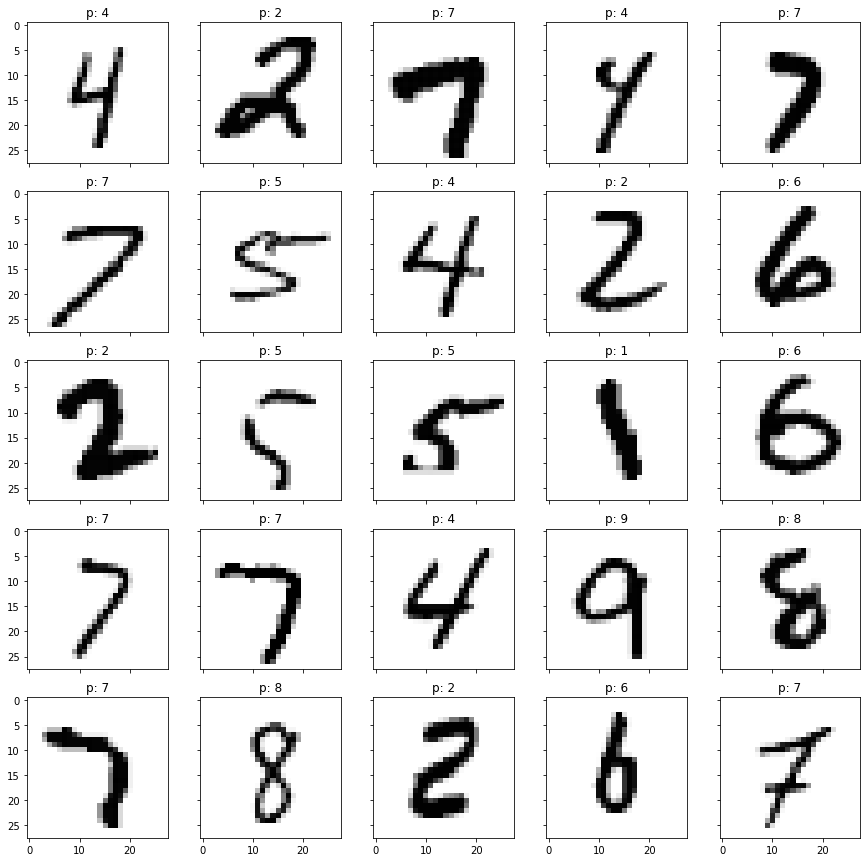

In [127]:
predict(model,X_test,25,50)

## SAVING THE MODEL

In [128]:
model.save('model.h5')

In [129]:
!tar -zcvf Digit-Recognition-model_new.tgz model.h5

model.h5


In [130]:
ls -1

DigitRecogDataset/
Digit_Recog_Model.tar.gz
Digit-Recognition-model_new.tgz
model.h5


In [131]:
!pip install watson-machine-learning-client --upgrade

In [132]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"85QXHqX1NPhcxGUbqhEx-vm90X2ZXd7-eY0BQ8pqUUUV"
}
client=APIClient(wml_credentials)

In [133]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [134]:
space_uid=guid_from_space_name(client,'Digit Recognition')
print("Space UID = "+space_uid)

Space UID = 8fc978c9-a6d6-4320-9c43-790cb87d6d88


In [135]:
client.set.default_space(space_uid)

'SUCCESS'

In [136]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [137]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [138]:
model_details=client.repository.store_model(model='Digit-Recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)

In [139]:
client.repository.download(model_id,'Digit_Recog_Model.tar.gz')

File with name: 'Digit_Recog_Model.tar.gz' already exists.


WMLClientError: File with name: 'Digit_Recog_Model.tar.gz' already exists.

In [140]:
ls

DigitRecogDataset/        Digit-Recognition-model_new.tgz
Digit_Recog_Model.tar.gz  model.h5


In [141]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [142]:
model=load_model("model.h5")

In [147]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g8zhqVmSpbZtmnQORKLSJZn4MX6TmWG1emMZlZ5COKpB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'novelmethodforhandwrittendigitrec-donotdelete-pr-sb2ogtldrhegen'
object_key = '3.PNG'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [148]:
img = Image.open(streaming_body_3).convert("L")
img = img.resize( (28,28) ) 

In [149]:
img

In [150]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1)



pred = model.predict(im2arr)
print(np.argmax(pred))

3
